# K-Means Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported")

Libraries imported


## Model Arcitecture

In [3]:
class KMeans:

    def __init__(self, k: int, max_iters: int = 100) -> None:
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        self.inertia = None


    def fit(self, X: np.ndarray) -> None:
        self.inertia = 0
        self.centroids = X[np.random.choice(a=X.shape[0], size=self.k, replace=False)]
        new_centroids = np.zeros(self.centroids.shape)

        for i in range(self.max_iters):

            assigned_clusters = []
            for x in X:
                distances = np.sqrt(np.sum((x - self.centroids)**2, axis=1))
                assigned_clusters.append(np.argmin(distances))

            for k in range(self.centroids):
                k_cluster_data = X[np.array(assigned_clusters) == k]
                new_centroids = np.mean(k_cluster_data, axis=0)

                for x in k_cluster_data:
                    self.inertia += np.sum((x - self.centroids[k])**2)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels = assigned_clusters

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((x - self.centroids)**2, axis=1))
            predictions.append(np.argmin(distances))
        return predictions
                

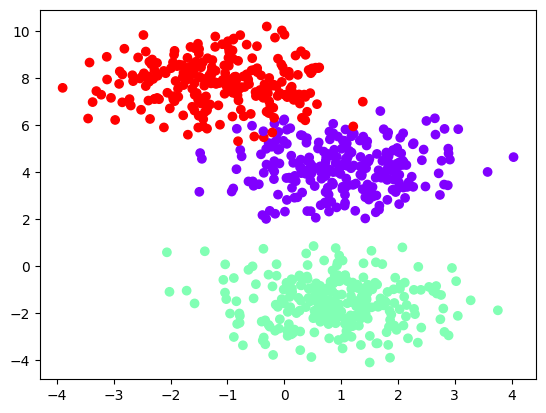

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')


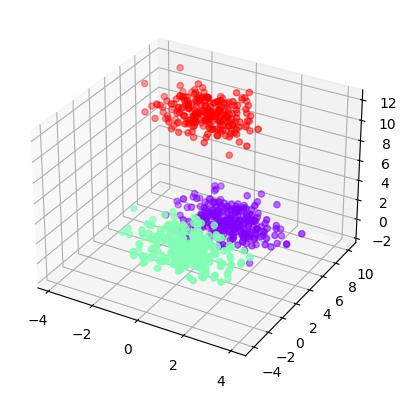

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='rainbow') 

In [6]:
X_train

array([[-1.27305587,  8.45031012, 10.3700149 ],
       [-1.56420349,  8.42854425, 10.24619523],
       [-3.3703834 ,  6.96882204,  9.10828418],
       ...,
       [ 2.02969208, -1.83566257,  4.53910619],
       [-0.13457882, -0.41274323,  3.16266356],
       [-0.34698637,  7.72234285,  9.18679802]])

In [7]:
assigned_clusters = []
centroids = X[np.random.choice(a=X.shape[0], size=3, replace=False)]
for i in range(len(X)):
    distances = np.sqrt(np.sum((X[i] - centroids)**2, axis=1))
    assigned_clusters.append(np.argmin(distances))

In [9]:
k_cluster_data = X[np.array(assigned_clusters) == 0]
np.sum((k_cluster_data - centroids[assigned_clusters])**2)


ValueError: operands could not be broadcast together with shapes (189,3) (1000,3) 